<a href="https://colab.research.google.com/github/Davs07/Modelo---Fatiga-Facial/blob/main/Prueba_Modelo_Fatiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# prompt: I want to use my "my_model.tflite" model

import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="my_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
output_data


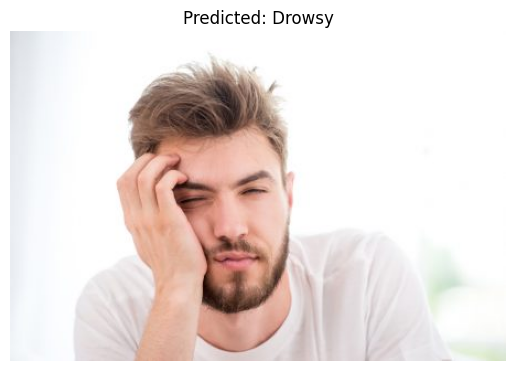

Prediction: Drowsy


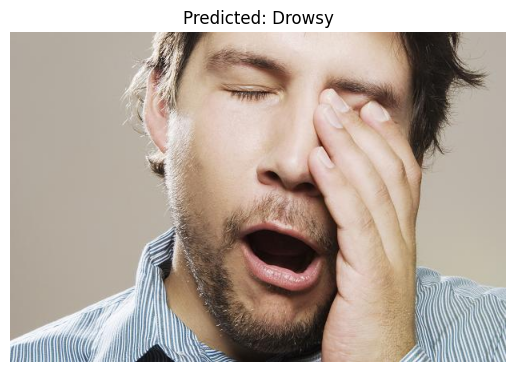

Prediction: Drowsy


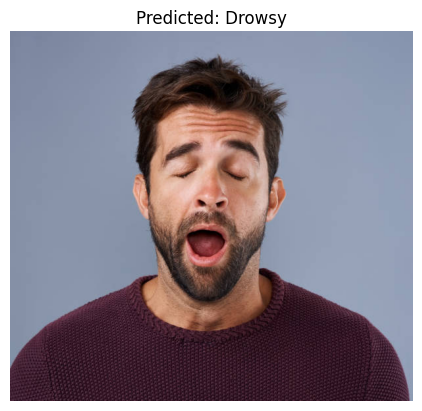

Prediction: Drowsy


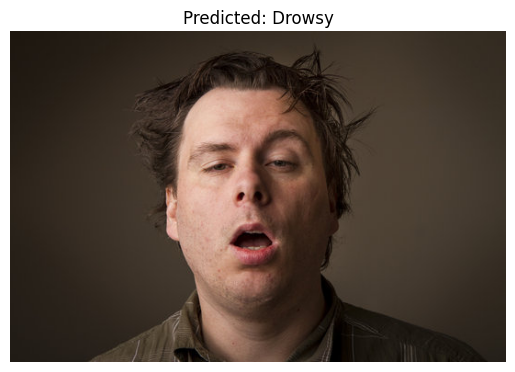

Prediction: Drowsy


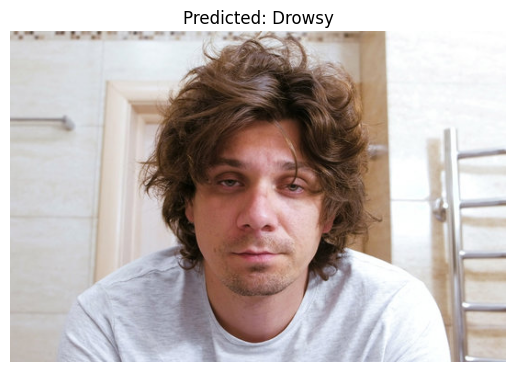

Prediction: Drowsy


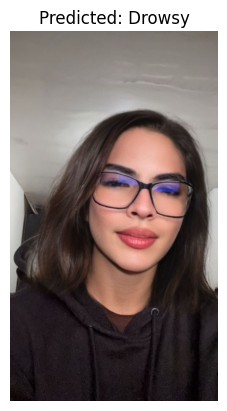

Prediction: Drowsy


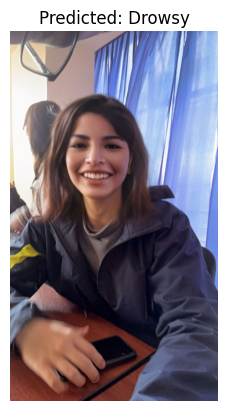

Prediction: Drowsy


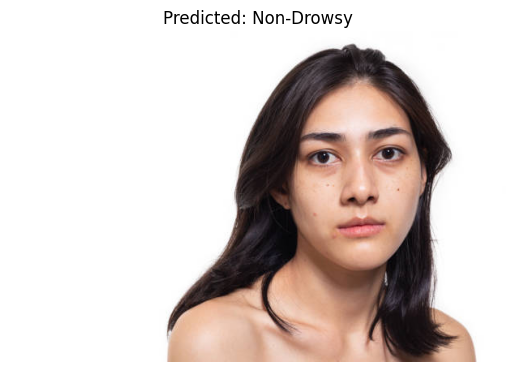

Prediction: Non-Drowsy


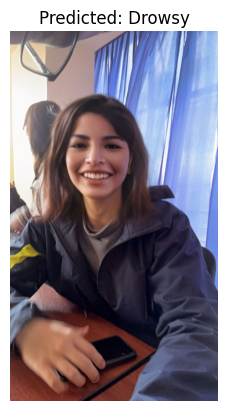

Prediction: Drowsy


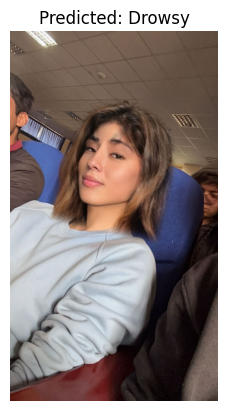

Prediction: Drowsy


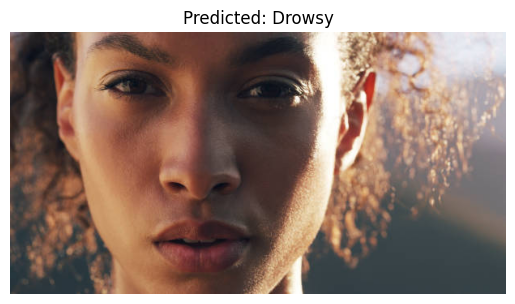

Prediction: Drowsy


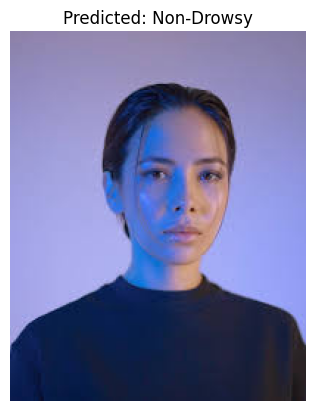

Prediction: Non-Drowsy


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import cv2

# Load the TFLite model
tflite_model_path = "/content/my_model.tflite"  # Replace with the path to your saved TFLite model
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Define a function to preprocess image for TFLite inference
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize to the input shape of the model
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img.astype(np.float32)

# Define a function to make predictions using TFLite model
def predict_image(image_path):
    # Preprocess the image
    input_image = preprocess_image(image_path)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_image)

    # Run inference
    interpreter.invoke()

    # Get the prediction
    output_data = interpreter.get_tensor(output_details[0]['index'])
    prediction = output_data[0][0]  # The model's output for binary classification

    # Map the prediction to the correct label
    if prediction >= 0.5:
        label = "Non-Drowsy"  # Prediction corresponds to class label 1
    else:
        label = "Drowsy"  # Prediction corresponds to class label 0

    # Load the image again to display
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Display the image with the predicted label
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {label}")
    plt.show()

    return label

# Function to sample random images from Drowsy and Non-Drowsy folders
def sample_images(dataset_path, sample_size=15):
    """Samples random images from Drowsy and Non-Drowsy folders."""
    categories = ['Drowsy', 'Non Drowsy']
    images = []

    for category in categories:
        category_path = os.path.join(dataset_path, category)
        category_images = os.listdir(category_path)

        # Check if the number of images in the category is less than sample_size // 2
        # If it is, sample all the images in the category
        num_samples = min(len(category_images), sample_size // 2)


        sampled_images = random.sample(category_images, num_samples)
        images.extend([os.path.join(category_path, img) for img in sampled_images])

    return images

dataset_path = "/content/drive/MyDrive/DDD_validation"
sampled_images = sample_images(dataset_path, sample_size=15)

# Perform inference on sampled images and display results
for img_path in sampled_images:
    if os.path.exists(img_path):
        result = predict_image(img_path)
        print(f"Prediction: {result}")
    else:
        print(f"Test image not found: {img_path}")
